# Setup & Data Exploration

## Importing necessary libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Loading the dataset

In [46]:
# Loading the dataset
df = pd.read_csv('./data/games.csv')

## Inspecting dataset

In [47]:
# Checking first few rows
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [48]:
df.shape

(16598, 11)

In [49]:
# Inspecting columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [50]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Data Cleaning & Transformation

## Handling missing values & duplicates

In [32]:
# Dropping null values if there are any
df.drop_duplicates(inplace=True)

In [34]:
print(f'There are {df.duplicated().sum()} duplicated rows exists')

There are 0 duplicated rows exists


In [35]:
# Checking how many null values exists
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [36]:
# Since there isn't much null values, i will drop the rows that has null values
df.dropna(inplace=True)

In [37]:
# Checking how many null values exists after dropping
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Converting data types

In [139]:
df['Year'] = df['Year'].astype(int) # Change year column data type to a datetime
df['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16598 entries, 0 to 16597
Series name: Year
Non-Null Count  Dtype
--------------  -----
16598 non-null  int32
dtypes: int32(1)
memory usage: 65.0 KB


## Creating new columns

In [68]:
df['NA_Regional_Share'] = (df['NA_Sales'] / df['Global_Sales'] * 100).round(2) # Regional Sales Share for NA Region
df['EU_Regional_Share'] = (df['EU_Sales'] / df['Global_Sales'] * 100).round(2) # Regional Sales Share for EU Region
df['JP_Regional_Share'] = (df['JP_Sales'] / df['Global_Sales'] * 100).round(2) # Regional Sales Share for JP Region
df['Other_Regional_Share'] = (df['Other_Sales'] / df['Global_Sales'] * 100).round(2) # Regional Sales Share for Other Regions

In [69]:
print(df.columns.tolist())

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'NA_Regional_Share', 'EU_Regional_Share', 'JP_Regional_Share', 'Other_Regional_Share']


In [70]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Regional_Share,EU_Regional_Share,JP_Regional_Share,Other_Regional_Share
0,1,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.15,35.07,4.56,10.22
1,2,Super Mario Bros.,NES,1970-01-01 00:00:00.000001985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.27,8.90,16.92,1.91
2,3,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.25,35.96,10.58,9.24
3,4,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.73,33.36,9.94,8.97
4,5,Pokemon Red/Pokemon Blue,GB,1970-01-01 00:00:00.000001996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.93,28.34,32.58,3.19


# Aggregation & Grouping

## Global sales by platform

In [89]:
# Group by 'Platform' and sum 'Global_Sales' 
global_sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().reset_index()
global_sales_by_platform.sort_values(by='Global_Sales', ascending=False, inplace=True)

global_sales_by_platform

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


## Top 10 publishers by total global sales

In [186]:
# Finding top 10 publishers by total global sales (millions of copies)
top_10_publishers_by_global_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()
top_10_publishers_by_global_sales.sort_values(by='Global_Sales', ascending=False, inplace=True)

top_10_publishers_by_global_sales = top_10_publishers_by_global_sales.head(10)
top_10_publishers_by_global_sales

,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72
494,Take-Two Interactive,399.54
488,THQ,340.77
275,Konami Digital Entertainment,283.64
446,Sega,272.99
347,Namco Bandai Games,254.09


## Average sales per genre

In [97]:
# Finding average sales per genre
avg_sales_per_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()
avg_sales_per_genre.sort_values(by='Global_Sales', ascending=False, inplace=True)

avg_sales_per_genre

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


## Yearly sales trend (Global sales per year)

In [150]:
# Finding yearly sales trend (sum of global sales per year)
global_sales_per_year = df.groupby('Year')['Global_Sales'].sum().reset_index()
global_sales_per_year.sort_values(by='Global_Sales', ascending=False, inplace=True)

global_sales_per_year = global_sales_per_year[global_sales_per_year['Year'] > 1900]
global_sales_per_year

,Year,Global_Sales
29,2008,678.90
30,2009,667.30
28,2007,611.13
31,2010,600.45
27,2006,521.04
32,2011,515.99
26,2005,459.94
25,2004,419.31
23,2002,395.52
34,2013,368.11


# Visualization & Insights

## Global Sales by Genre

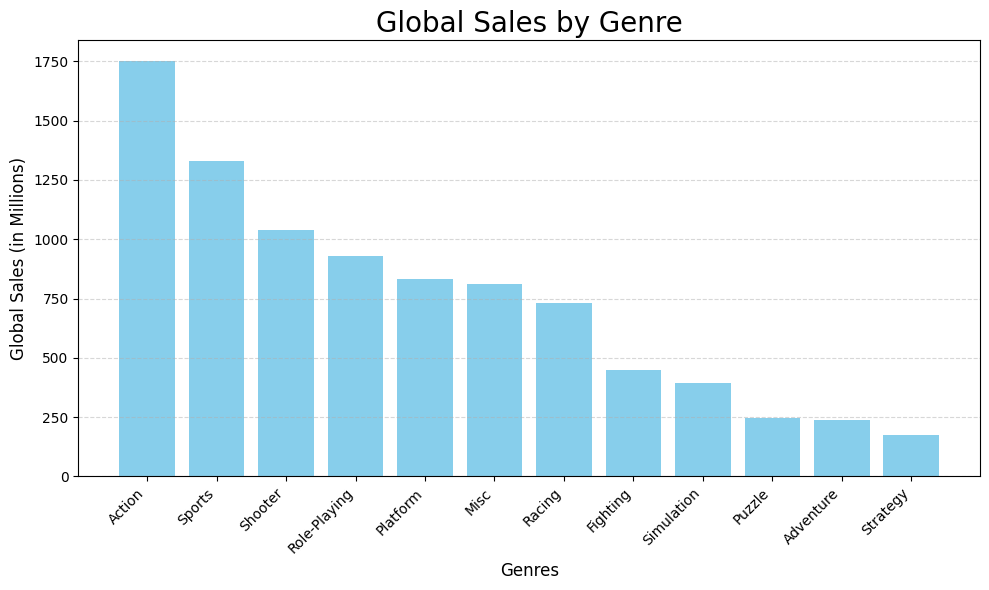

In [180]:
# Creating the Bar Chart
plt.figure(figsize=(10,6))
plt.bar(
    avg_sales_per_genre['Genre'],
    avg_sales_per_genre['Global_Sales'],
    color='Skyblue'
)

# Adding title and labels
plt.title('Global Sales by Genre', fontsize=20)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Global Sales (in Millions)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('Global_Sales_by_Genre_Bar_Chart.png', dpi=300)

plt.show()
plt.close()


## Yearly Sales Trend

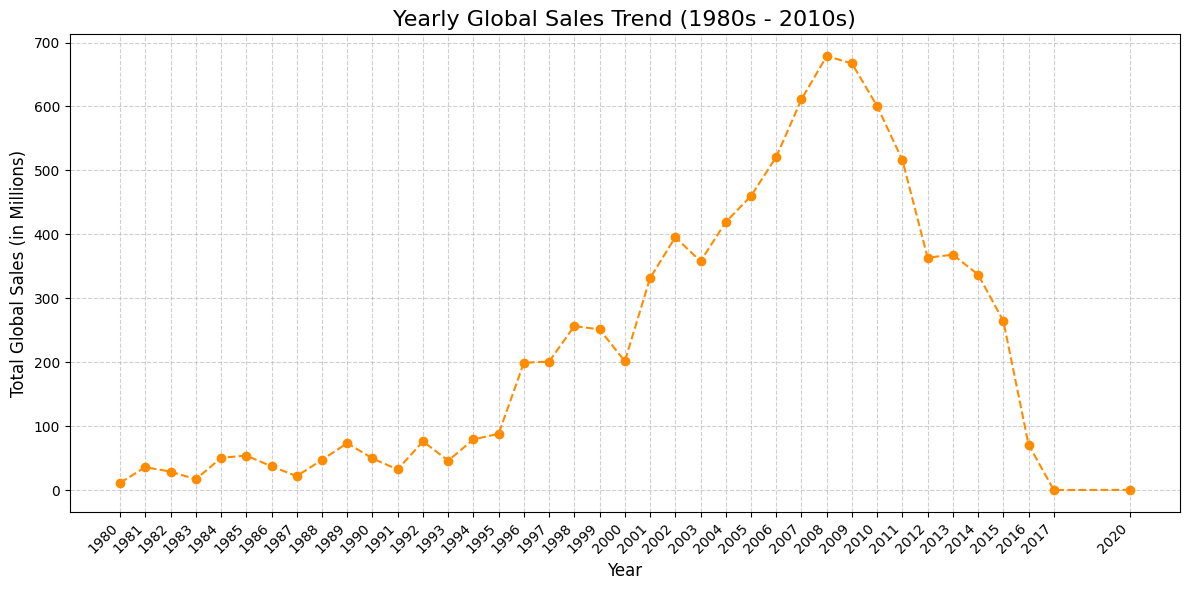

In [181]:
# Creating the line plot
global_sales_per_year.sort_values(by='Year', ascending=True, inplace=True)

plt.figure(figsize=(12,6))
plt.plot(
    global_sales_per_year['Year'],
    global_sales_per_year['Global_Sales'],
    marker='o',
    linestyle='--',
    color='darkorange'
)

# Add labels and title
plt.title('Yearly Global Sales Trend (1980s - 2010s)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Global Sales (in Millions)', fontsize=12)

# Set x-ticks to only show integer years
plt.xticks(global_sales_per_year['Year'].unique(), rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('Yearly_Global_Sales_Trend.png', dpi=300)

plt.show()
plt.close()

## Top 10 Publishers by Total Global Sales

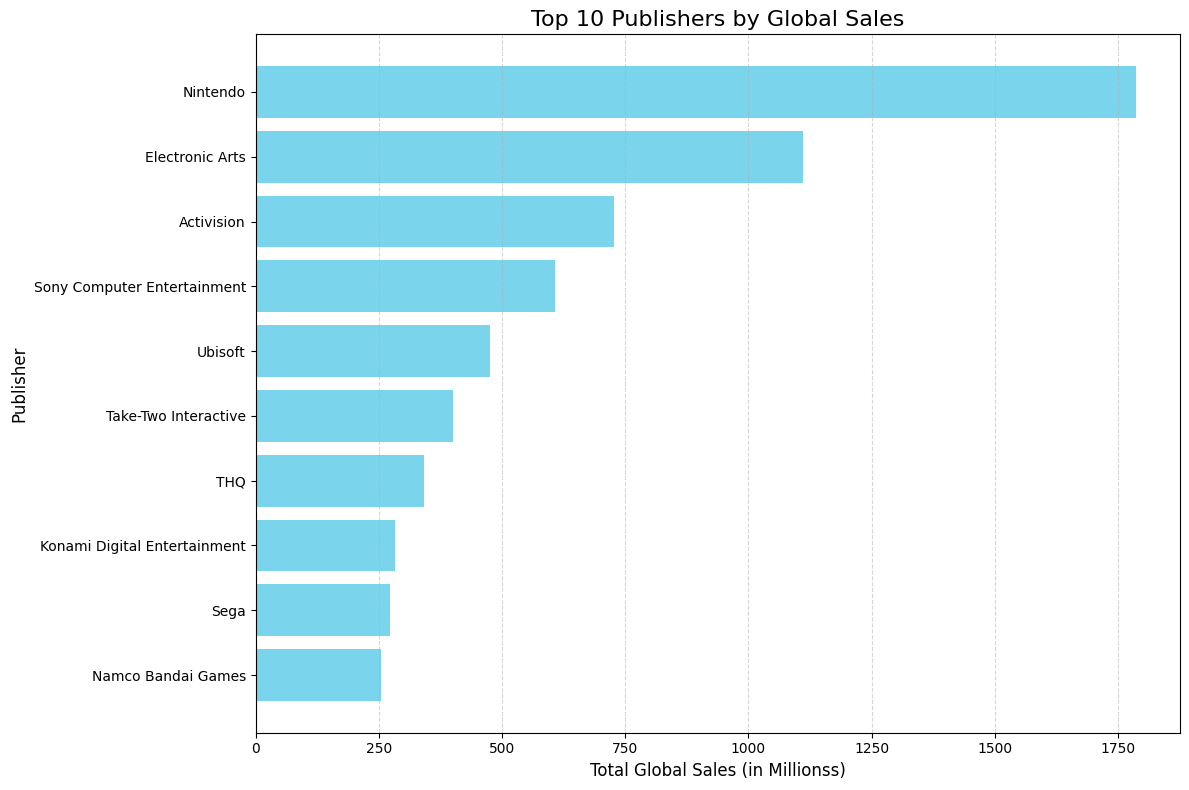

In [192]:
# Creating the horizontal bar chart
plt.figure(figsize=(12,8))
plt.barh(
    top_10_publishers_by_global_sales['Publisher'],
    top_10_publishers_by_global_sales['Global_Sales'],
    color='#7ad4eb'
)

# Invert y-axis to display the largest bar at the top
plt.gca().invert_yaxis()

# Add title and labels
plt.title('Top 10 Publishers by Global Sales', fontsize=16)
plt.xlabel('Total Global Sales (in Millionss)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)

# Add grid lines for easier comparison
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the plot
plt.savefig('Top_10_Publishers_by_Global_sales_HBar_Chart.png', dpi=300)

plt.show()
plt.close()

## Platform Popularity

C:\Users\bedoo\AppData\Local\Temp\ipykernel_23264\3907792608.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Blues', len(pie_data))


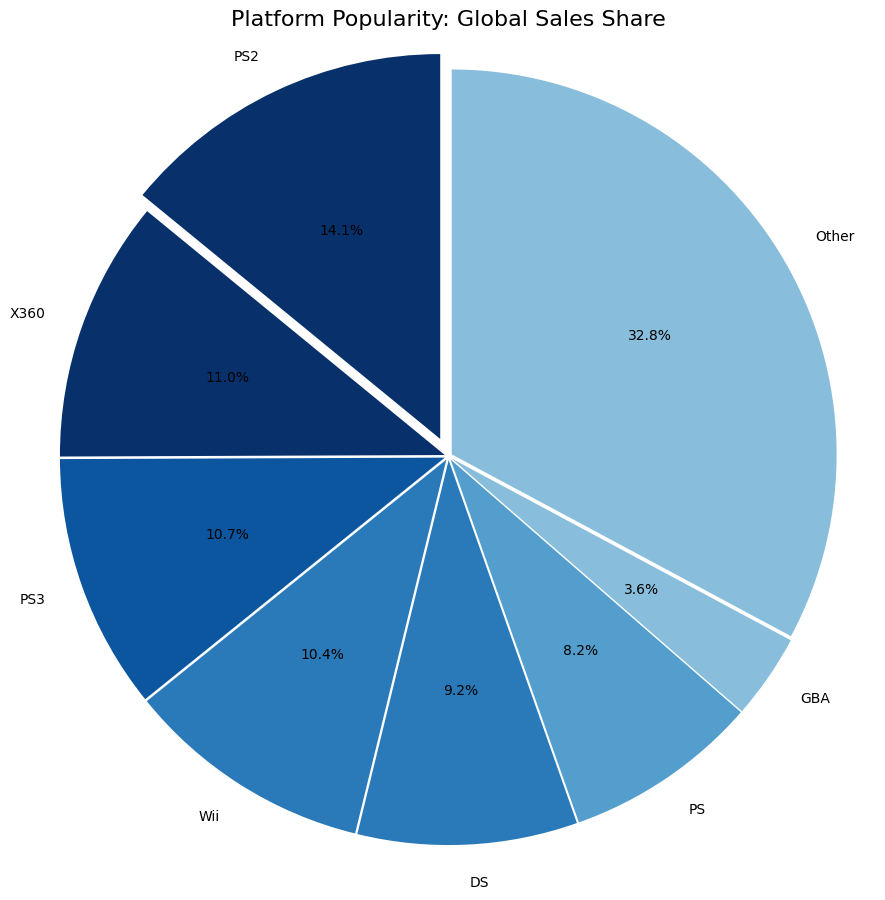

In [225]:
# Select Top 5 platform and group the rest into 'Other'
n = 7
top_platforms = global_sales_by_platform.head(n)
other_sales = global_sales_by_platform['Global_Sales'][n:].sum()

pie_data = top_platforms.copy()

# Append the "Other" slice
if other_sales > 0:
    other_row = pd.DataFrame({'Platform': ['Other'], 'Global_Sales': [other_sales]})
    pie_data = pd.concat([pie_data, other_row], ignore_index=True)

# Creating the Pie Chart
plt.figure(figsize=(9,9))

# Defining color gradient
colors = cm.get_cmap('Blues', len(pie_data))
color_list = [colors(i) for i in np.linspace(0.4, 1.0, len(pie_data))]
color_list.reverse()

explode = [0.05] + [0.01] * (len(pie_data) - 1)

plt.pie(
    pie_data['Global_Sales'],
    labels=pie_data['Platform'],
    autopct='%1.1f%%', # Show percentage with one decimal points
    startangle=90,     # Start the largest slice from the top
    explode=explode,
    colors=color_list
)

plt.title('Platform Popularity: Global Sales Share', fontsize=16)
plt.axis('equal') 
plt.tight_layout()

plt.savefig('Platform_Popularity_Pie_Chart.png')
plt.show()
plt.close()